<a href="https://colab.research.google.com/github/rivaldomrtd/Algoritma_00s/blob/main/RivaldoMartaDinata(1461900135)_HanaNofiaSafitri(1461900149)_SefiraAyuFebriyanti(1461900180)_EAS_KCBV_2021_2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import tensorflow as tf
import glob as gb
import cv2

#For visualization
import matplotlib.pyplot as plt
%matplotlib inline

#For image preprocessing
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image

In [ ]:
#drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#llokasi
train_path = 'drive/MyDrive/earth/train'
test_path = 'drive/MyDrive/earth/test'

In [ ]:
#cek isi data
for folder in  os.listdir(train_path) : 
    files = gb.glob(pathname= str( train_path +'//' + folder + '/*.png'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 4 in folder Hybrid
For training data , found 3 in folder Low
For training data , found 3 in folder Tremor
For training data , found 4 in folder Tektonik


In [ ]:
#cek isi data
for folder in  os.listdir(test_path) : 
    files = gb.glob(pathname= str( test_path +'//' + folder + '/*.png'))
    print(f'For training data , found {len(files)} in folder {folder}')

For training data , found 4 in folder Hybrid
For training data , found 3 in folder Low
For training data , found 3 in folder Tremor
For training data , found 4 in folder Tektonik


In [ ]:

size = []
for folder in  os.listdir(train_path) : 
    files = gb.glob(pathname= str( train_path +'//' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
        
pd.Series(size).value_counts()

(72, 340, 4)     1
(137, 704, 4)    1
(133, 710, 4)    1
(137, 709, 4)    1
(163, 411, 4)    1
(70, 338, 4)     1
(71, 338, 4)     1
(168, 409, 4)    1
(83, 340, 4)     1
(103, 286, 4)    1
(161, 421, 4)    1
(69, 339, 4)     1
(120, 500, 4)    1
(124, 497, 4)    1
dtype: int64

In [ ]:
size = []
for folder in  os.listdir(test_path) : 
    files = gb.glob(pathname= str( test_path +'//' + folder + '/*.png'))
    for file in files: 
        image = plt.imread(file)
        size.append(image.shape)
pd.Series(size).value_counts()

(72, 340, 4)     1
(137, 704, 4)    1
(133, 710, 4)    1
(137, 709, 4)    1
(163, 411, 4)    1
(70, 338, 4)     1
(71, 338, 4)     1
(168, 409, 4)    1
(83, 340, 4)     1
(103, 286, 4)    1
(161, 421, 4)    1
(69, 339, 4)     1
(120, 500, 4)    1
(124, 497, 4)    1
dtype: int64

In [ ]:
#item di dalam fotlder
code = {'Hybrid':0 ,'Low':1,'Tektonik':2,'Tremor':3}

def getcode(n) : 
    for x , y in code.items() : 
        if n == y : 
            return x 

In [ ]:
X = []
y = []
for folder in  os.listdir(train_path) : 
    files = gb.glob(pathname= str( train_path +'//' + folder + '/*.png'))
    for file in files: 
        image = cv2.imread(file)
        image_array = cv2.resize(image , (64,64))
        X.append(list(image_array))
        y.append(code[folder])

In [ ]:
print(f'we have {len(X)} items in training set')

we have 14 items in training set


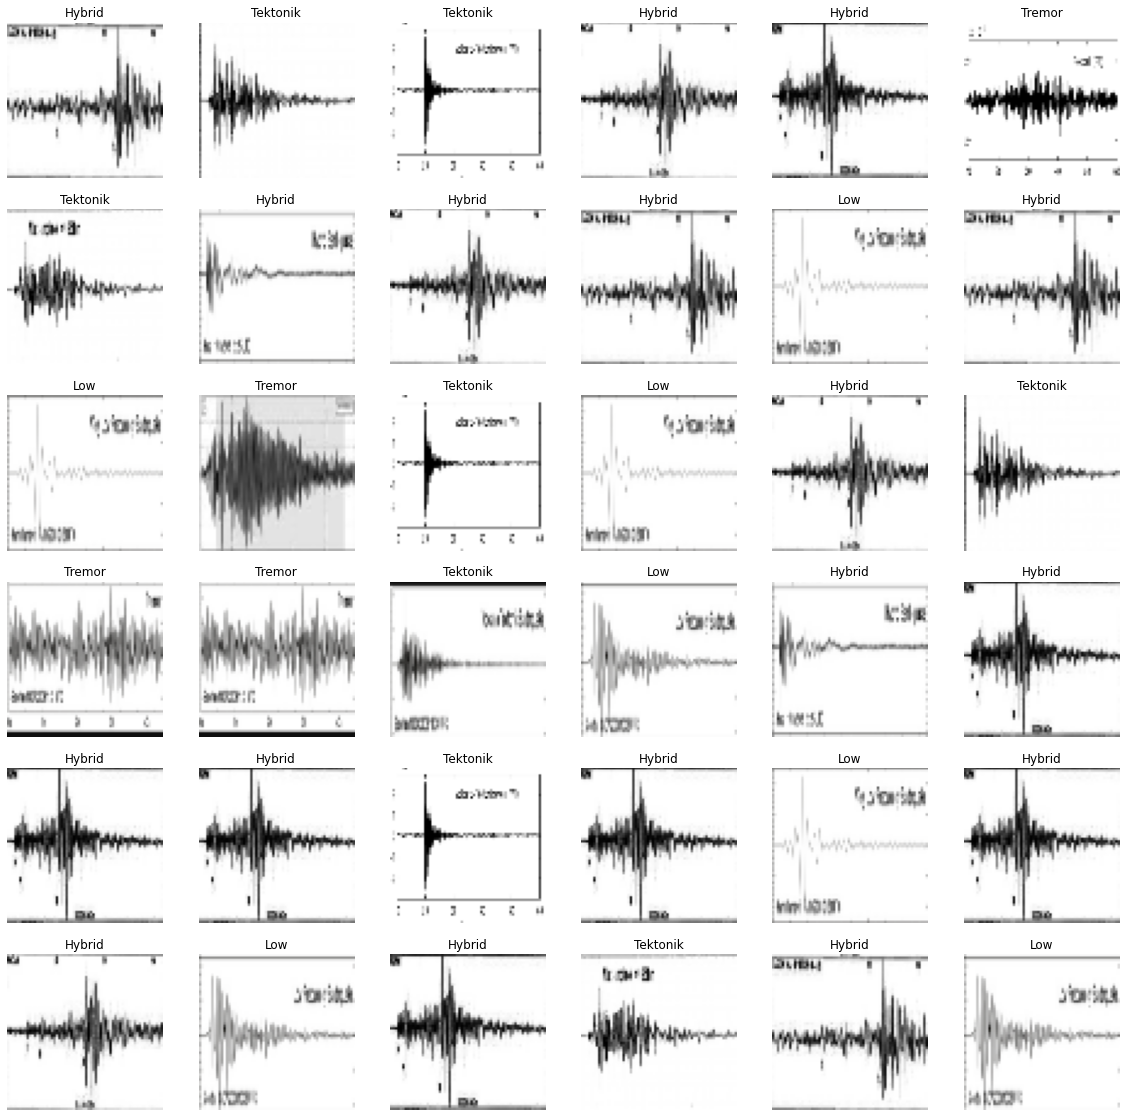

In [ ]:
plt.figure(figsize=(20,20))
for n , i in enumerate(list(np.random.randint(0,len(X),36))) : 
    plt.subplot(6,6,n+1)
    plt.imshow(X[i])   
    plt.axis('off')
    plt.title(getcode(y[i]))

In [ ]:
#ubah skala nilai dari citra
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [ ]:
#data di clasifikasikan
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'categorical',
                                                 color_mode='rgb',
                                                 shuffle=True)

Found 14 images belonging to 4 classes.


In [ ]:
#data di clasifikasikan dan di ubah nilai citranya
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory(test_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'categorical',
                                            color_mode='rgb',
                                            shuffle=False)

Found 14 images belonging to 4 classes.


In [ ]:
cnn=tf.keras.models.Sequential()

In [ ]:
#Gunakan cnn dengan model relu dan sigmoid
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Conv2D(filters=32,kernel_size=3, activation='relu',input_shape=[64,64,3]))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2,strides=2))
cnn.add(tf.keras.layers.Flatten())
cnn.add(tf.keras.layers.Dense(units=128,activation='relu'))
cnn.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))
cnn.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])


In [ ]:
#coba test akurasi
epochs=25
history = cnn.fit(
  training_set,
  validation_data=test_set,
  epochs=epochs
)

Epoch 1/25
1/1 [==============================] - 0s 295ms/step - loss: 0.5630 - accuracy: 0.7500 - val_loss: 0.5632 - val_accuracy: 0.7500
Epoch 2/25
1/1 [==============================] - 0s 252ms/step - loss: 0.5630 - accuracy: 0.7500 - val_loss: 0.5630 - val_accuracy: 0.7500
Epoch 3/25
1/1 [==============================] - 0s 236ms/step - loss: 0.5631 - accuracy: 0.7500 - val_loss: 0.5629 - val_accuracy: 0.7500
Epoch 4/25
1/1 [==============================] - 0s 244ms/step - loss: 0.5628 - accuracy: 0.7500 - val_loss: 0.5628 - val_accuracy: 0.7500
Epoch 5/25
1/1 [==============================] - 0s 235ms/step - loss: 0.5629 - accuracy: 0.7500 - val_loss: 0.5627 - val_accuracy: 0.7500
Epoch 6/25
1/1 [==============================] - 0s 232ms/step - loss: 0.5627 - accuracy: 0.7500 - val_loss: 0.5627 - val_accuracy: 0.7500
Epoch 7/25
1/1 [==============================] - 0s 241ms/step - loss: 0.5629 - accuracy: 0.7500 - val_loss: 0.5628 - val_accuracy: 0.7500
Epoch 8/25
1/1 [====

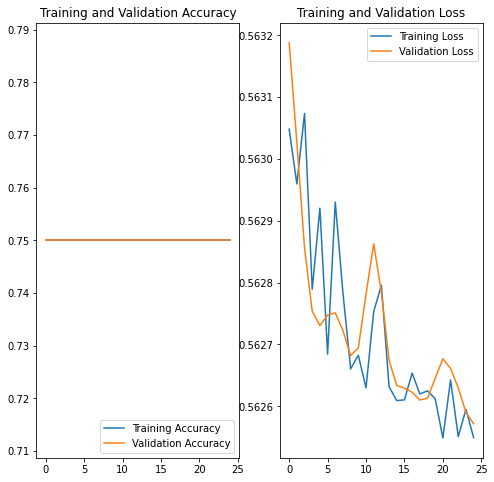

In [ ]:
#cetak hasil akurasi
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(epochs)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

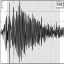

In [ ]:
#uji coba gambar dengan model
test_image = tf.keras.utils.load_img('drive/MyDrive/earth/train/Tremor/2022-05-05_14h05_42.png', target_size = (64, 64))
test_image

In [ ]:
test_image = tf.keras.utils.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)

In [ ]:
#logika Hasil Result
result = cnn.predict(test_image/255.0)

if result[0][0] < 0.21:
    prediction = "normal"

if (result[0][0] >= 0.22 ):
    prediction = "siaga"
if result[0][0] > 0.25:
    prediction = "awas"
 
print(prediction)

awas
